In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [11]:
X, y = load_iris(return_X_y=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [29]:
class SMOTE:
    def __init__(self, k_neighbors=3):
        self.k_neighbors = k_neighbors

    def fit_resample(self, X, y):
        classes, class_counts = np.unique(y, return_counts=True)

        max_class_size = np.max(class_counts)
        
        X_resampled = []
        y_resampled = []

        synthetic_samples = []
        synthetic_labels = []
        
        for class_label in classes:
            class_samples = X[y == class_label]
            n_class_samples = class_samples.shape[0]

            if n_class_samples < max_class_size:
                n_to_generate = max_class_size - n_class_samples

                nn = NearestNeighbors(n_neighbors=self.k_neighbors).fit(class_samples)
                neighbors = nn.kneighbors(class_samples, return_distance=False)
                
                for _ in range(n_to_generate):
                    sample_idx = np.random.randint(0, n_class_samples)
                    neighbor_idx = np.random.choice(neighbors[sample_idx][1:])
        
                    sample = class_samples[sample_idx]
                    neighbor = class_samples[neighbor_idx]
        
                    diff = neighbor - sample
                    gap = np.random.rand()
                    synthetic_samples.append(sample + gap * diff)
                    synthetic_labels.append(class_label)

        X_resampled = np.vstack((X, synthetic_samples))
        y_resampled = np.hstack((y, synthetic_labels))
        return X_resampled, y_resampled

In [30]:
smote = SMOTE(k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
print("y_train:", Counter(y_train))
print("y_train_resampled:", Counter(y_train_resampled))

y_train: Counter({2: 44, 0: 42, 1: 41})
y_train_resampled: Counter({2: 44, 0: 44, 1: 44})


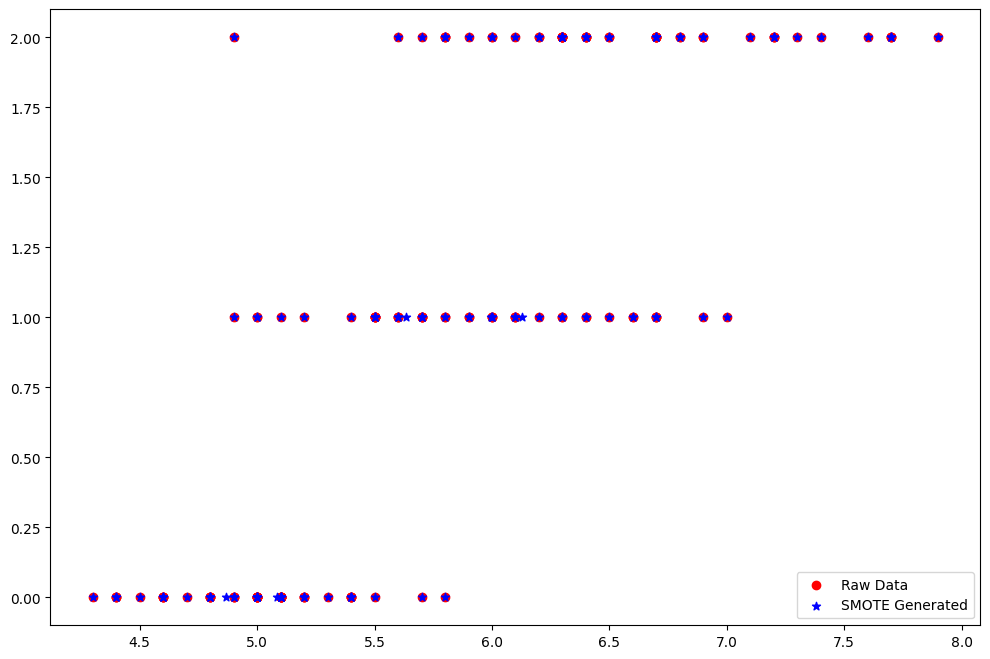

In [32]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 0], y_train, color="r", marker="o")
plt.scatter(X_train_resampled[:, 0], y_train_resampled, color="b", marker="*")
plt.legend(["Raw Data", "SMOTE Generated"])
plt.show()